<a href="https://www.kaggle.com/code/sakib01/rape-case-analysis-from-prothom-alo-2013-2019?scriptVersionId=95095539" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Rape case analysis
In this notebook, we at first explore the Prothom Alo newspaper dataset (2013-2019), then analyse the rape cases occured in this time period. with the daily star dataset(2007-2012) and Prothom Alo newspaper dataset (2013-2019)

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 7 csv files in the current version of the dataset:


In [9]:
print(os.listdir('../input'))

['daily-star-small-sets', 'prothomalo']


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [10]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [11]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [12]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: ../input/content_2013.csv

In [13]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# content_2013.csv has 59945 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../input/prothomalo/content_2013.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'content_2013.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 12 columns


Let's take a quick look at what the data looks like:

In [14]:
df1.head(5)

,date,title,subtitle,author,comment,ref,section,media,page,tags,content,article_id
0,2013-05-07,ঐক্যের ডাক মালয়েশীয় প্রধানমন্ত্রীরাজাকের,দ্বিতীয়মেয়াদে শপথ গ্রহণ,প্রথম আলো ডেস্ক,NaN,https://www.prothomalo.com/international/artic...,international,print,1,এশিয়া,মালোয়েশিয়ার সাধারণ নির্বাচনে ক্ষমতাসীন জোটের...,188
1,2013-05-07,ওয়েবসাইটে রবীন্দ্র পাণ্ডুলিপি,NaN,অমর সাহা. কলকাতা,NaN,https://www.prothomalo.com/international/artic...,international,print,1,ভারত,কবিগুরু রবীন্দ্রনাথ ঠাকুরের প্রায় সব পাণ্ডুলি...,187
2,2013-05-07,বিরোধপূর্ণ সীমান্ত থেকে সেনা প্রত্যাহার শুরু ভ...,NaN,প্রথম আলো ডেস্ক,NaN,https://www.prothomalo.com/international/artic...,international,print,1,ভারত,ভারত ও চীন গতকাল সোমবার হিমালয় এলাকার বিরোধপূ...,186
3,2013-05-07,যুক্তরাষ্ট্রে‘ঘরোয়া সন্ত্রাস’ আল-কায়েদারনবকৌশল,নিউইয়র্ক টাইমসেরবিশ্লেষণ,প্রথম আলো ডেস্ক,NaN,https://www.prothomalo.com/international/artic...,international,print,1,যুক্তরাষ্ট্র,সন্ত্রাসী হামলা মোকাবিলায় যুক্তরাষ্ট্র তার প্...,185
4,2013-05-07,সিরিয়ায় বিদ্রোহীরা সারিন গ্যাস ব্যবহার করেছে!,NaN,প্রথম আলো ডেস্ক,NaN,https://www.prothomalo.com/international/artic...,international,print,1,আরব বিশ্ব,সিরিয়ায় জাতিসংঘ তদন্ত দলের প্রধান কার্লা ডেল...,184


Distribution graphs (histogram/bar graph) of sampled columns:

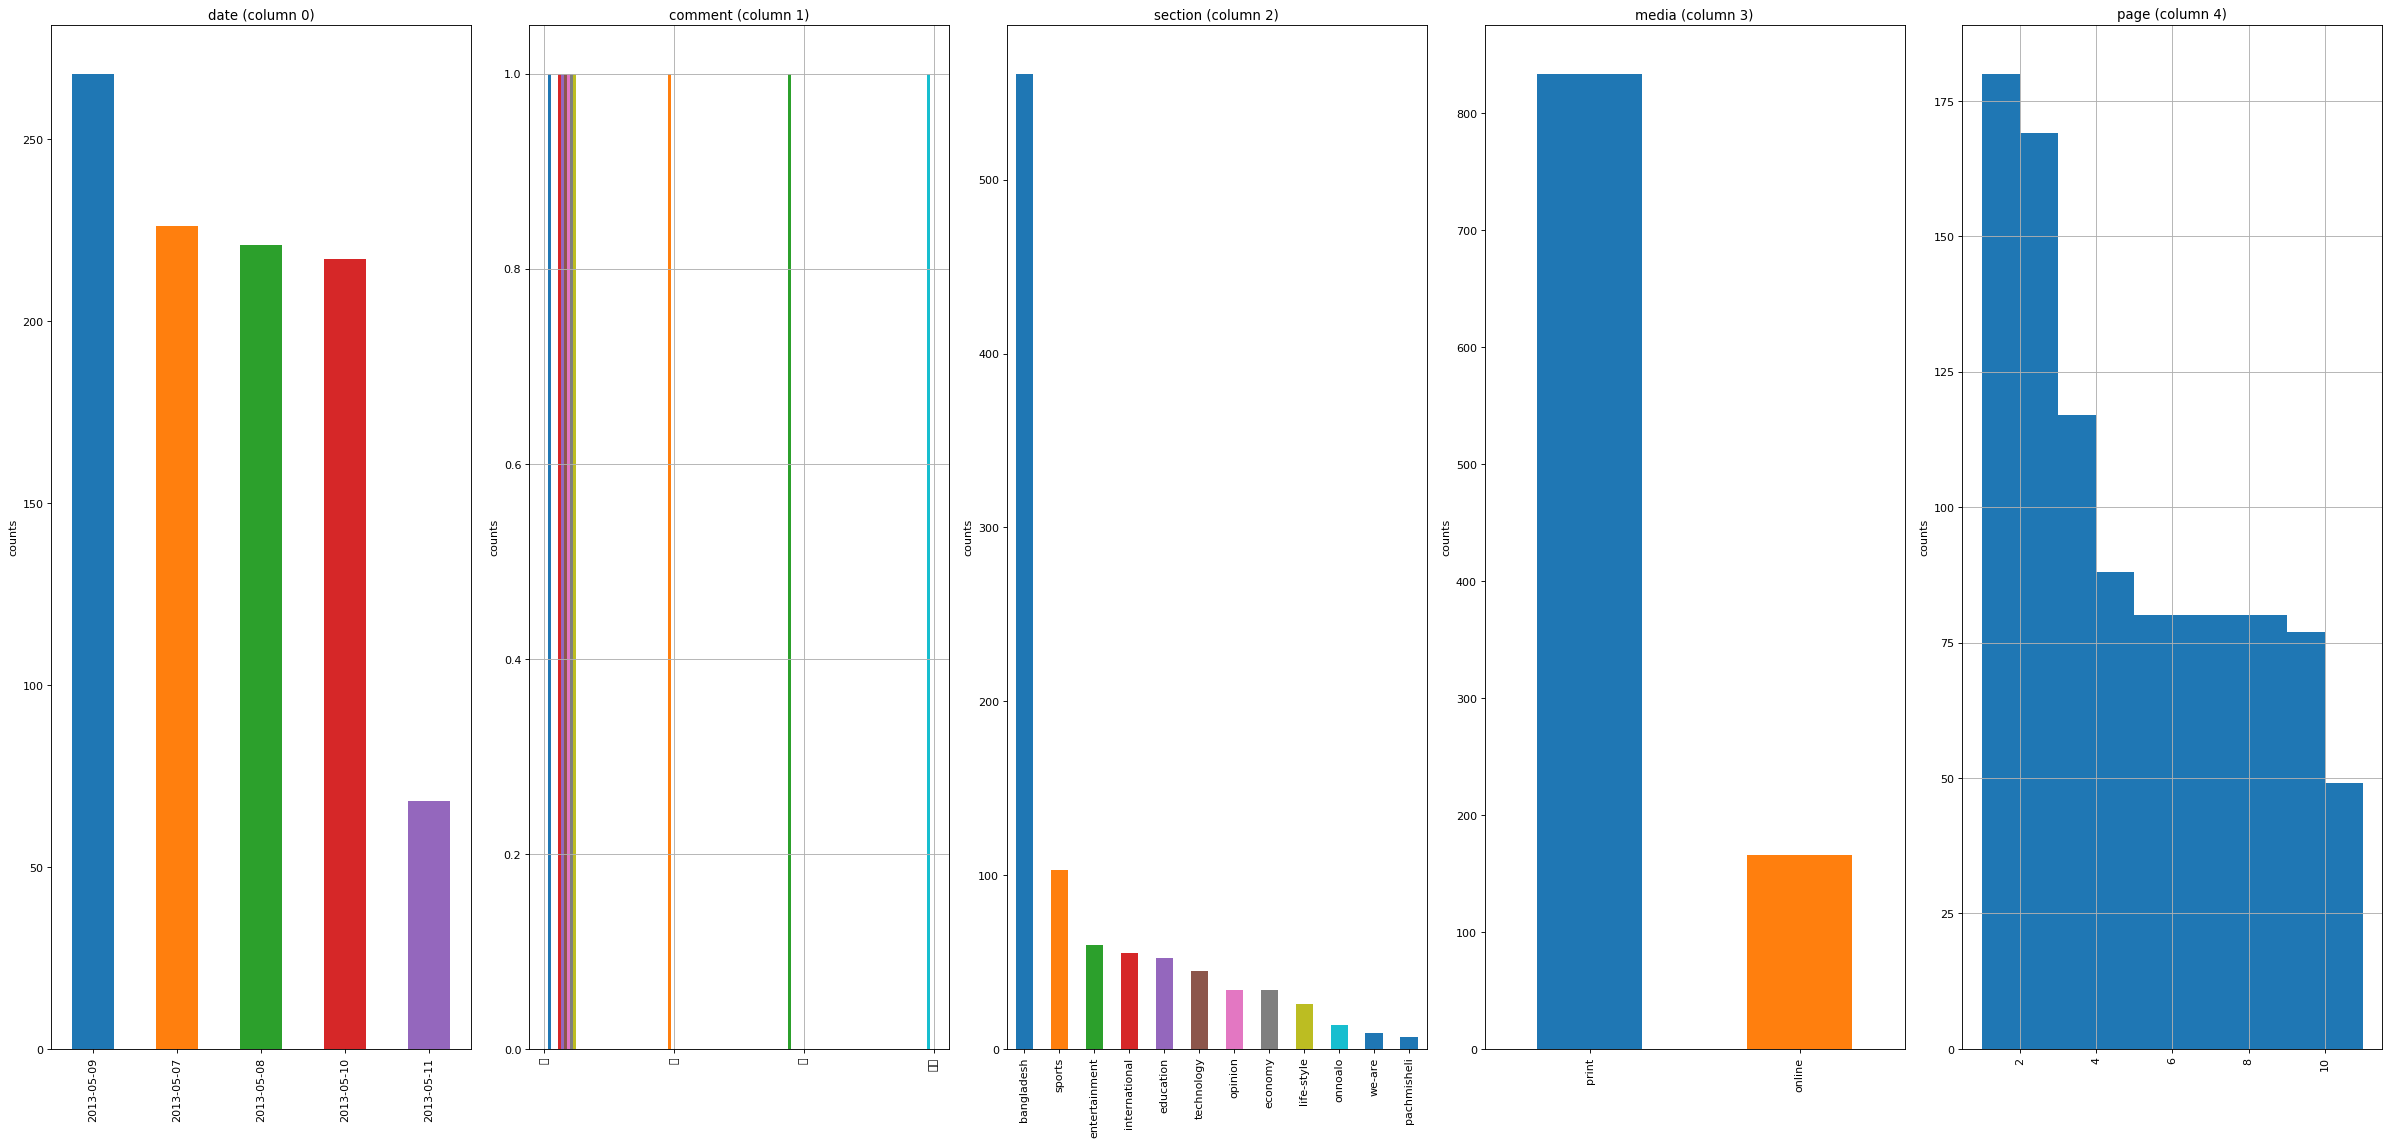

In [15]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

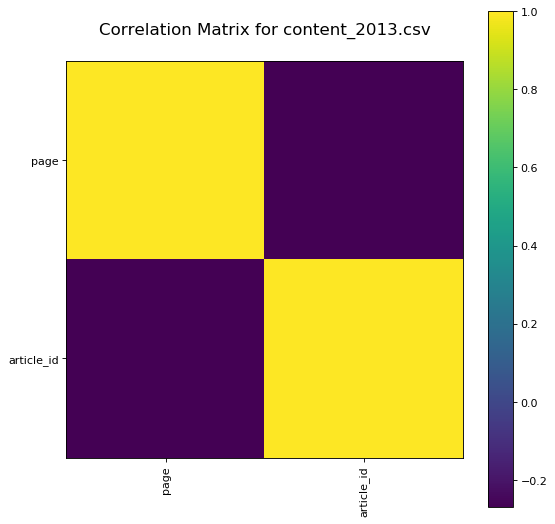

In [16]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

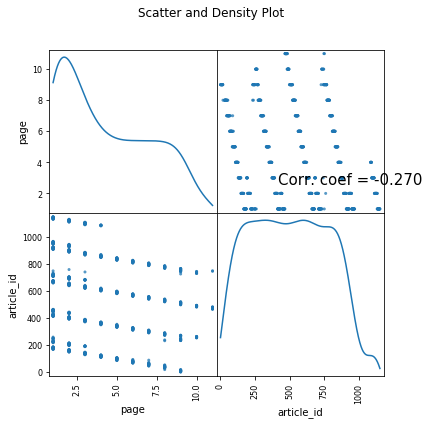

In [17]:
plotScatterMatrix(df1, 6, 15)

### Let's check 2nd file: ../input/content_2014.csv

In [18]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# content_2014.csv has 97335 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('../input/prothomalo/content_2014.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'content_2014.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 12 columns


Let's take a quick look at what the data looks like:

In [19]:
df2.head(5)

,date,title,subtitle,author,comment,ref,section,media,page,tags,content,article_id
0,2014-01-01,শেষ হাসি প্রাইম ব্যাংকের,NaN,ক্রীড়া প্রতিবেদক,NaN,https://www.prothomalo.com/sports/article/1129...,sports,print,1,খেলা|দেশের ক্রিকেট|টি টোয়েন্টি ক্রিকেট,ফাইনালে এসেই তাহলে বোঝা গেল আসল পার্থক্যটা!লিগ...,112984
1,2014-01-01,‘আমি যা করেছি. তা নিয়ে গর্বিত’,NaN,মন্তব্য,৮,https://www.prothomalo.com/sports/article/1129...,sports,print,1,খেলা|সাক্ষাৎকার,জ্যাক ক্যালিস বিদায় নিলেন ক্যালিসের মতো করেই. ...,112981
2,2014-01-01,মোহামেডানের ক্যাপেলা-বরণ,NaN,ক্রীড়া প্রতিবেদক,৩,https://www.prothomalo.com/sports/article/1129...,sports,print,1,খেলা|দেশের ফুটবল,দীর্ঘ বিমানভ্রমণের ধকলটা ভালোভাবে কাটেনি। ঢাকা...,112978
3,2014-01-01,প্রথম দিনটা পাকিস্তানের,আবুধাবি টেস্ট,ক্রীড়া প্রতিবেদক,NaN,https://www.prothomalo.com/sports/article/1129...,sports,print,1,খেলা|আন্তর্জাতিক ক্রিকেট,এক উইকেটে ৬৬ রান নিয়ে মধ্যাহ্ন বিরতিতে গেল শ্র...,112975
4,2014-01-01,আরও এগিয়ে যাক বাংলাদেশ,স্বাগত ২০১৪: মাশরাফি বিন মুর্তজা লিখছেন প্রথম ...,মন্তব্য,৩,https://www.prothomalo.com/sports/article/1129...,sports,print,1,খেলা|দেশের ক্রিকেট,পারফরম্যান্স যত ভালো হয়. প্রত্যাশা বাড়ে পাল্লা...,112972


Distribution graphs (histogram/bar graph) of sampled columns:

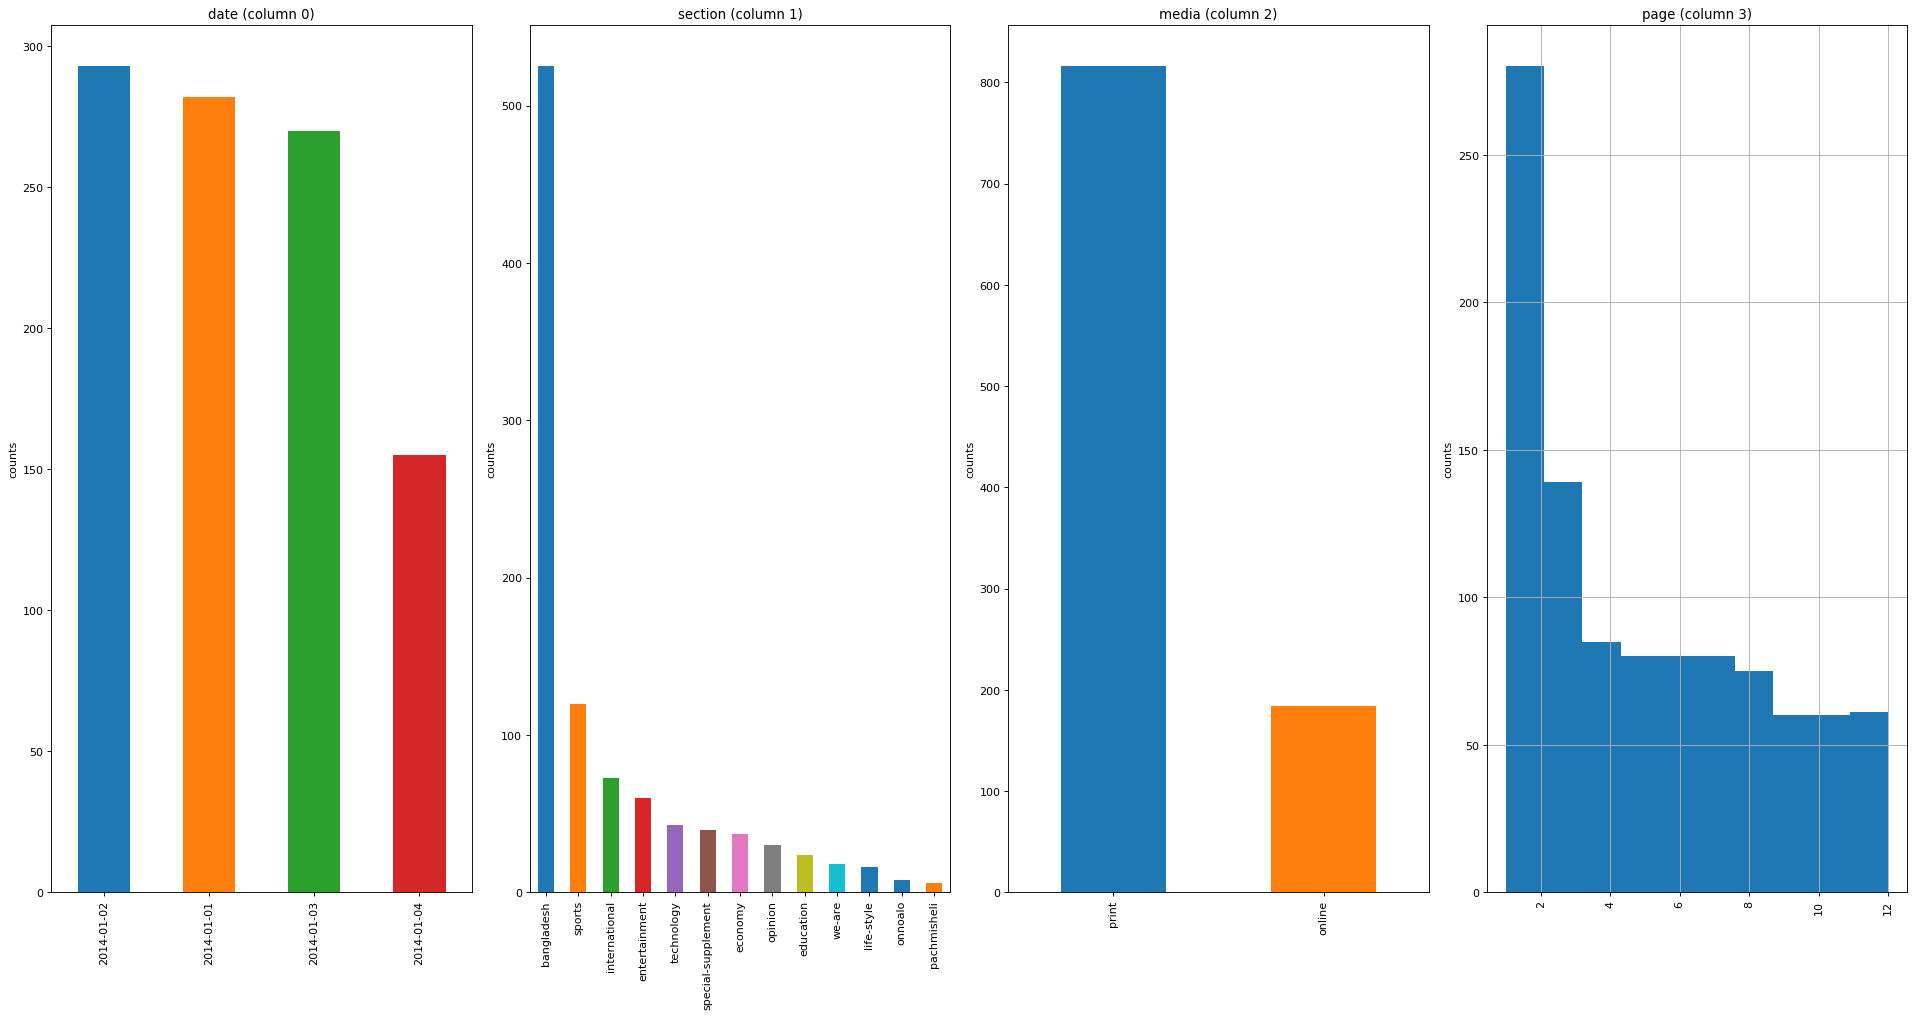

In [20]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

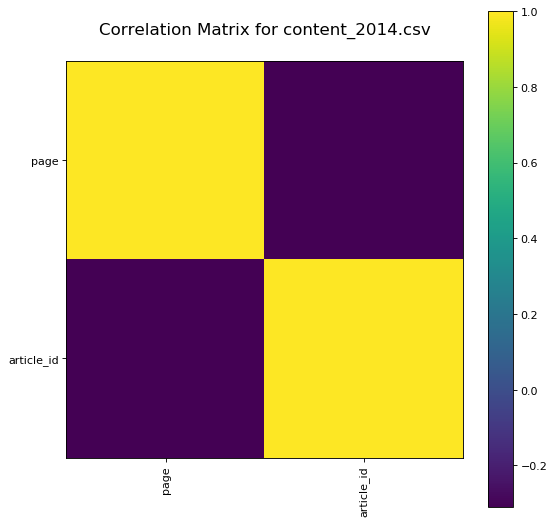

In [21]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

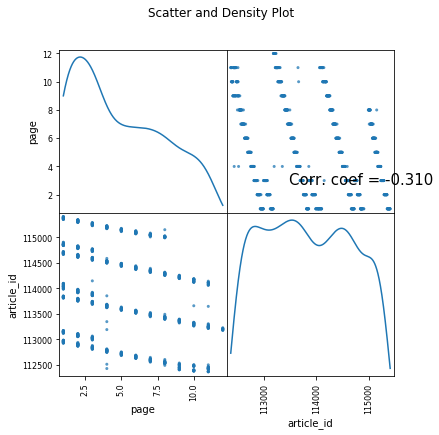

In [22]:
plotScatterMatrix(df2, 6, 15)

### Let's check 3rd file: ../input/content_2015.csv

In [23]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# content_2015.csv has 102637 rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('../input/prothomalo/content_2015.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'content_2015.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 12 columns


Let's take a quick look at what the data looks like:

In [24]:
df3.head(5)

,date,title,subtitle,author,comment,ref,section,media,page,tags,content,article_id
0,2015-01-01,সুন্দরবন লড়ছে,NaN,ইফতেখার মাহমুদ. সুন্দরবন থেকে ফিরে,১০,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,1,পরিবেশ,আন্ধারমানিক খালের দুই পাড়জুড়ে কালো কার্পেটের...,412942
1,2015-01-01,নৌপথ বন্ধ করার সুপারিশ,সুন্দরবনে ট্যাংকারডুবি: জাতিসংঘ ও সরকারের যৌথ ...,নিজস্ব প্রতিবেদক,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,1,পরিবেশ,সুন্দরবনের ভেতর দিয়ে নৌ চলাচল বন্ধ করার সুপার...,412939
2,2015-01-01,দীর্ঘ মেয়াদের প্রভাব নিয়েই দুশ্চিন্তা,সাক্ষাৎকার : মাইকেল জিকার্ডি,NaN,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,1,পরিবেশ,মাইকেল জিকার্ডি ওয়েল ওয়াইল্ড লাইফ নেটওয়ার্ক...,412936
3,2015-01-01,দেশের মানবাধিকার চিত্র উদ্বেগজনক,আইন ও সালিশ কেন্দ্রের পর্যালোচনা,নিজস্ব প্রতিবেদক,৬,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,1,রাজধানী (জাতীয়),বাংলাদেশের ২০১৪ সালের সার্বিক মানবাধিকার পরিস্...,412933
4,2015-01-01,নির্বাচনের জন্য সাত দফা প্রস্তাব খালেদার,NaN,নিজস্ব প্রতিবেদক,৮,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,1,রাজনীতি,নির্দলীয় সরকারের অধীনে অবিলম্বে নতুন নির্বাচন...,412930


Distribution graphs (histogram/bar graph) of sampled columns:

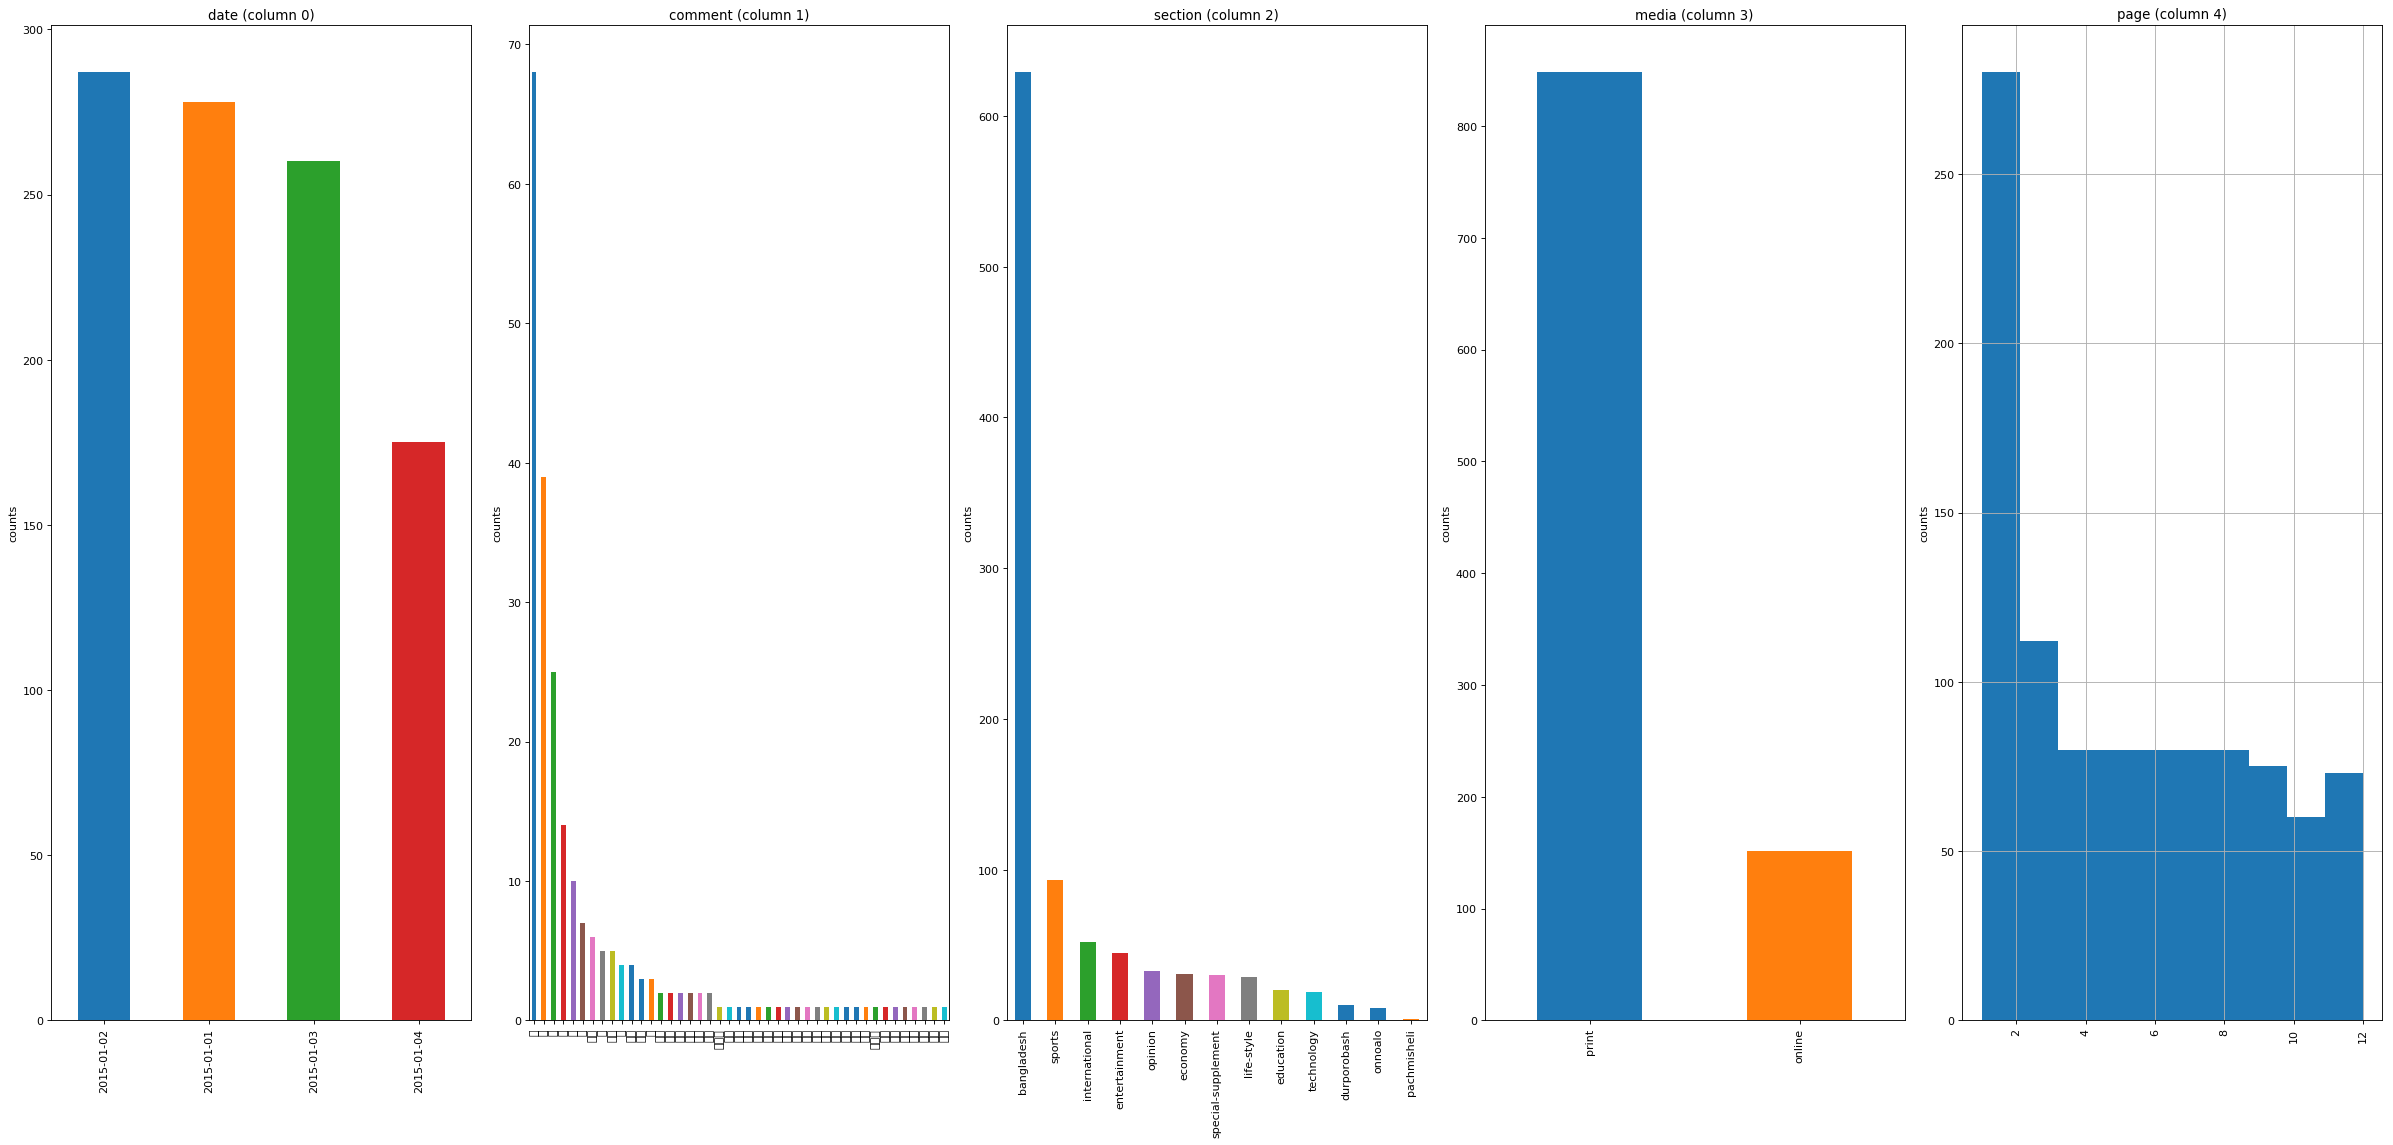

In [25]:
plotPerColumnDistribution(df3, 10, 5)

Correlation matrix:

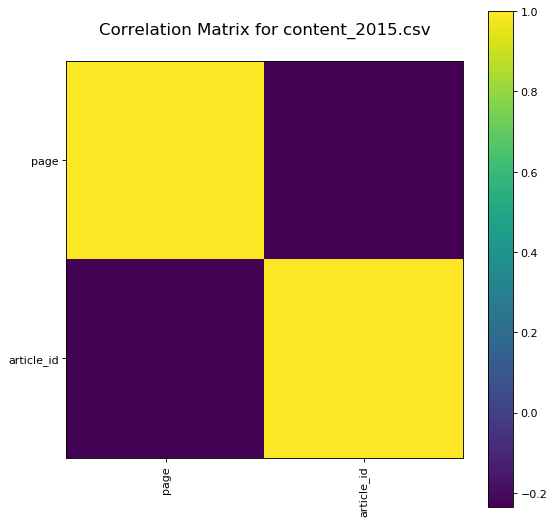

In [26]:
plotCorrelationMatrix(df3, 8)

Scatter and density plots:

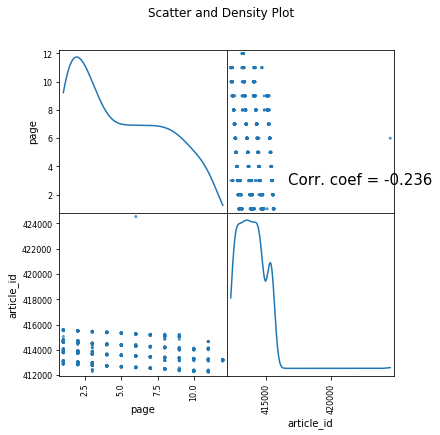

In [27]:
plotScatterMatrix(df3, 6, 15)

In [28]:
df1 = pd.read_csv('../input/prothomalo/content_2013.csv', delimiter=',')
df2 = pd.read_csv('../input/prothomalo/content_2014.csv', delimiter=',')
df3 = pd.read_csv('../input/prothomalo/content_2015.csv', delimiter=',')
df4 = pd.read_csv('../input/prothomalo/content_2016.csv', delimiter=',')
df5 = pd.read_csv('../input/prothomalo/content_2017.csv', delimiter=',')
df6 = pd.read_csv('../input/prothomalo/content_2018.csv', delimiter=',')
df7 = pd.read_csv('../input/prothomalo/content_2019.csv', delimiter=',')


In [29]:
df1.iloc[0][0]

'2013-05-07'

In [30]:
dfd2007 = pd.read_excel('../input/daily-star-small-sets/daily_star (2007).xlsx')

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [31]:
dfd2008_1 = pd.read_excel('../input/daily-star-small-sets/daily_star(200817281- 37280).xlsx')
dfd2008_2 = pd.read_excel('../input/daily-star-small-sets/daily_star(200837280-52280).xlsx')
dfd2008_3 = pd.read_excel('../input/daily-star-small-sets/daily_star(200852281- 69445).xlsx')


In [32]:
dfd2008 = pd.concat([dfd2008_1, dfd2008_2, dfd2008_3], axis=0)

In [33]:
dfd2009_1 = pd.read_excel('../input/daily-star-small-sets/daily_star(2009 69446 - 89446).xlsx')
dfd2009_2 = pd.read_excel('../input/daily-star-small-sets/daily_star(200989446-99446).xlsx')
dfd2009_3 = pd.read_excel('../input/daily-star-small-sets/daily_star(200999446 109446).xlsx')

In [34]:
dfd2009 = pd.concat([dfd2009_1, dfd2009_2, dfd2009_3], axis=0)

In [35]:
dfd2010_1 = pd.read_excel('../input/daily-star-small-sets/daily_star(2010119927 1349927).xlsx')
dfd2010_2 = pd.read_excel('../input/daily-star-small-sets/daily_star(2010134927 150927).xlsx')
dfd2010_3 = pd.read_excel('../input/daily-star-small-sets/daily_star(2010150927 168230).xlsx')

In [36]:
dfd2010 = pd.concat([dfd2010_1, dfd2010_2, dfd2010_3], axis=0)

In [37]:
dfd2011_1 = pd.read_excel('../input/daily-star-small-sets/daily_star(2011168230 183230).xlsx')
dfd2011_2 = pd.read_excel('../input/daily-star-small-sets/daily_star(2011183230 200000).xlsx')
dfd2011_3 = pd.read_excel('../input/daily-star-small-sets/daily_star(2011200000 216433).xlsx')

In [38]:
dfd2011 = pd.concat([dfd2011_1, dfd2011_2, dfd2011_3], axis=0)

In [39]:
dfd2012_1 = pd.read_excel('../input/daily-star-small-sets/daily_star(2012216433 231433).xlsx')
dfd2012_2 = pd.read_excel('../input/daily-star-small-sets/daily_star(2012231433 246433).xlsx')
dfd2012_3 = pd.read_excel('../input/daily-star-small-sets/daily_star(2012246433  263325).xlsx')

In [40]:
dfd2012 = pd.concat([dfd2012_1, dfd2012_2, dfd2012_3], axis=0)

to handle datatype problem

In [41]:
dfd_1 = pd.concat([dfd2007, dfd2008], axis=0)

In [42]:
dfd_2 = pd.concat([dfd2009, dfd2010, dfd2011, dfd2012], axis=0)

In [43]:
dfd_2['Date'] = pd.to_datetime(dfd_2['Date'])

In [44]:
dfd_2.iloc[0][0]

Timestamp('2009-01-01 00:00:00')

In [45]:
dfd_1.iloc[0][0]

Timestamp('2007-08-15 00:00:00')

In [46]:
df_total = pd.concat([dfd_1, dfd_2], axis=0)

In [47]:
str(dfd2008.iloc[0][0].date())

'2008-01-01'

In [49]:
dfd_1.head()

,Date,Title,keyword,Content
0,2007-08-15,No room for confusion over polls by Dec 2008,"Unb, Rajshahi",Chief Adviser (CA) Fakhrudding Ahmed yesterday...
1,2007-08-15,Banks asked to cut interest on essential impor...,Staff Correspondent,The central bank yesterday directed all the ba...
2,2007-08-15,"Voter list, NID scheme to cost Tk 580cr",Shakhawat Liton,The Election Commission (EC) has readied a Tk ...
3,2007-08-15,Nation today mourns for Bangabandhu,Staff Correspondent,With a call for officially recognising Bangaba...
4,2007-08-15,ACC probing Khaleda's wealth statement,"Unb, Dhaka",The Anti-Corruption Commission (ACC) has start...


In [50]:
df_total_alo = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)

In [51]:
#df_total 

In [52]:
df_total_alo  = df_total_alo.reset_index(drop = True) #p a

In [53]:
df_total  = df_total.reset_index(drop = True)

In [54]:
df_total.head()

,Date,Title,keyword,Content
0,2007-08-15,No room for confusion over polls by Dec 2008,"Unb, Rajshahi",Chief Adviser (CA) Fakhrudding Ahmed yesterday...
1,2007-08-15,Banks asked to cut interest on essential impor...,Staff Correspondent,The central bank yesterday directed all the ba...
2,2007-08-15,"Voter list, NID scheme to cost Tk 580cr",Shakhawat Liton,The Election Commission (EC) has readied a Tk ...
3,2007-08-15,Nation today mourns for Bangabandhu,Staff Correspondent,With a call for officially recognising Bangaba...
4,2007-08-15,ACC probing Khaleda's wealth statement,"Unb, Dhaka",The Anti-Corruption Commission (ACC) has start...


In [55]:
df_total['rape_news'] = df_total['Title'].str.contains('rape|rapist|Rape|Rapist', regex = True).map({True:1, False:0}) #for prothom alo ধর্ষণ|ধর্ষন

In [56]:
df_total_alo['rape_news'] = df_total_alo['title'].str.contains('ধর্ষণ|ধর্ষন', regex = True).map({True:1, False:0}) #for prothom alo ধর্ষণ|ধর্ষন

In [57]:
df_total[df_total['rape_news'] == 1]

,Date,Title,keyword,Content,rape_news
593,2007-08-19,Cop sent to jail on rape charge,Staff Correspondent,A Dhaka court yesterday sent an assistant sub-...,1
1571,2007-08-28,Three jailed for rape,"Our Correspondent, Chittagong",A Chittagong court yesterday sentenced three p...,1
4061,2007-09-19,North Korea scrape into quarterfinals,"Afp, Shanghai",The United States rolled into the World Cup qu...,1
4717,2007-09-24,Housewife killed after gangrape in city,Staff Correspondent,A housewife was slaughtered in front of her tw...,1
5483,2007-10-01,Five to die for killing girl after gangrape,"Unb, Laxmipur",A special tribunal here yesterday sentenced fi...,1
7007,2007-10-18,Three rapists hanged in public in Iran,"Afp, Tehran",Iran yesterday hanged three convicted rapists ...,1
7197,2007-10-20,Japan probes US soldiers over gang rape,"Afp, Tokyo",Japanese police are investigating four US Mari...,1
10306,2007-11-14,Dhaka scrape through,Sports Reporter,,1
12426,2007-12-02,Scottish supporter raped?,"Afp, Madrid",A supporter of Scottish football club Aberdeen...,1
12896,2007-12-06,Sherpur health complex doctor held in rape case,"Staff Correspondent, Bogra",Sherpur police arrested a medical officer of S...,1


In [58]:
df_total_alo[df_total_alo['rape_news'] == 1]

,date,title,subtitle,author,comment,ref,section,media,page,tags,content,article_id,rape_news
57,2013-05-07,শেরপুরে আদিবাসী কিশোরীকে ধর্ষণ. একজন আটক,NaN,শেরপুর (বগুড়া) প্রতিনিধি,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,3,বগুড়া|শেরপুর,বগুড়ার শেরপুর উপজেলার ভবানীপুর ইউনিয়নে ১৩ বছ...,131,1
290,2013-05-08,মির্জাপুরে এইচএসসি পরীক্ষার্থী ধর্ষণের শিকার. ...,NaN,মির্জাপুর (টাঙ্গাইল) প্রতিনিধি,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,4,ঢাকা বিভাগ|বিশাল বাংলা|টাঙ্গাইল|মির্জাপুর,টাঙ্গাইলের মির্জাপুরে গত সোমবার এক এইচএসসি পরী...,367,1
563,2013-05-09,গৃহবধূকে অপহরণ করে ধর্ষণের চেষ্টা একজন গ্রেপ্তার,NaN,নারায়ণগঞ্জ প্রতিনিধি,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,6,ঢাকা বিভাগ|বিশাল বাংলা|নারায়ণগঞ্জ,নারায়ণগঞ্জ সদর উপজেলায় এক গৃহবধূকে অপহরণের প...,564,1
593,2013-05-09,মধুখালীতে শিশু ধর্ষণের শিকার একজন গ্রেপ্তার,NaN,ফরিদপুর অফিস,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,8,ঢাকা বিভাগ|বিশাল বাংলা|ফরিদপুর|মধুখালী,ফরিদপুরের মধুখালীতে আট বছরের একটি শিশু ধর্ষণের...,534,1
595,2013-05-09,কালকিনিতে শিশু ধর্ষণের অভিযোগ তরুণ গ্রেপ্তার,NaN,কালকিনি (মাদারীপুর) প্রতিনিধি,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,8,বিশাল বাংলা|কালকিনি|মাদারীপুর,মাদারীপুরের কালকিনি পৌর এলাকায় গত মঙ্গলবার সক...,532,1
1246,2013-05-12,মাদ্রাসাছাত্রী ধর্ষণের শিকার,NaN,ব্রাহ্মণবাড়িয়া প্রতিনিধি,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,5,ঢাকা বিভাগ|বিশাল বাংলা|ব্রাহ্মণবাড়িয়া,ব্রাহ্মণবাড়িয়ার বিজয়নগরে চতুর্থ শ্রেণীর এক ...,1302,1
1382,2013-05-12,কেন তাদের এই শিশু ধর্ষণ?,NaN,অনলাইন ডেস্ক,NaN,https://www.prothomalo.com/international/artic...,international,online,2,ভারত,ভারতের দিল্লির অল ইন্ডিয়া ইনস্টিটিউট অব মেডিক...,1399,1
1447,2013-05-13,কিশোরী গণধর্ষণের শিকার. গ্রেপ্তার ৪,NaN,বাঞ্ছারামপুর (ব্রাহ্মণবাড়িয়া) প্রতিনিধি,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,3,অপরাধ|ব্রাহ্মণবাড়িয়া|বাঞ্ছারামপুর,ব্রাহ্মণবাড়িয়ার বাঞ্ছারামপুর উপজেলায় গত শনি...,1579,1
1490,2013-05-13,ধর্ষণের অভিযোগে পুলিশে সোপর্দ,NaN,নারায়ণগঞ্জ প্রতিনিধি,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,5,ঢাকা বিভাগ|বিশাল বাংলা|নারায়ণগঞ্জ,নারায়ণগঞ্জ নগরের জামতলার ধোপাপট্টি মহল্লায় গ...,1535,1
1943,2013-05-15,চকরিয়ায় গৃহবধূ ধর্ষণের শিকার. গ্রেপ্তার ৫,NaN,চকরিয়া (কক্সবাজার) প্রতিনিধি,NaN,https://www.prothomalo.com/bangladesh/article/...,bangladesh,print,6,চট্টগ্রাম|বিশাল বাংলা|কক্সবাজার|চকরিয়া,কক্সবাজারের চকরিয়া উপজেলার হারবাং ইউনিয়নের ভ...,1967,1


In [59]:
#(df_total.find('ধর্ষণ') != -1 or df_total.find('ধর্ষন') != -1)

In [60]:
#df_total['date'] = pd.to_datetime(df_total['date'])

In [61]:

df_total['weekday_name'] = [d.strftime('%a') for d in df_total['Date']]

In [62]:
df_total['week_number'] = [str(d.week) + " " + str(d.year) for d in df_total['Date']]

In [63]:
df_total['month_number'] = [str(d.month) + " " + str(d.year) for d in df_total['Date']]

In [64]:
#alo
df_total_alo['date'] = pd.to_datetime(df_total_alo['date'])
df_total_alo['weekday_name'] = [d.strftime('%a') for d in df_total_alo['date']]
df_total_alo['week_number'] = [str(d.week) + " " + str(d.year) for d in df_total_alo['date']]
df_total_alo['month_number'] = [str(d.month) + " " + str(d.year) for d in df_total_alo['date']]

In [65]:
df_total.head()

,Date,Title,keyword,Content,rape_news,weekday_name,week_number,month_number
0,2007-08-15,No room for confusion over polls by Dec 2008,"Unb, Rajshahi",Chief Adviser (CA) Fakhrudding Ahmed yesterday...,0,Wed,33 2007,8 2007
1,2007-08-15,Banks asked to cut interest on essential impor...,Staff Correspondent,The central bank yesterday directed all the ba...,0,Wed,33 2007,8 2007
2,2007-08-15,"Voter list, NID scheme to cost Tk 580cr",Shakhawat Liton,The Election Commission (EC) has readied a Tk ...,0,Wed,33 2007,8 2007
3,2007-08-15,Nation today mourns for Bangabandhu,Staff Correspondent,With a call for officially recognising Bangaba...,0,Wed,33 2007,8 2007
4,2007-08-15,ACC probing Khaleda's wealth statement,"Unb, Dhaka",The Anti-Corruption Commission (ACC) has start...,0,Wed,33 2007,8 2007


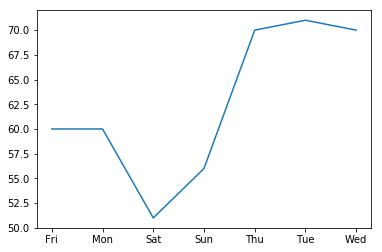

In [66]:
import matplotlib.pyplot as plt

plt.plot(df_total.groupby('weekday_name')['rape_news'].sum())

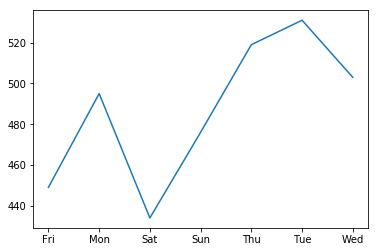

In [67]:

#alo
plt.plot(df_total_alo.groupby('weekday_name')['rape_news'].sum())

In [68]:
df_total.groupby('weekday_name')['rape_news'].sum()

weekday_name
Fri    60
Mon    60
Sat    51
Sun    56
Thu    70
Tue    71
Wed    70
Name: rape_news, dtype: int64

In [69]:
df_total_alo.groupby('weekday_name')['rape_news'].sum()

weekday_name
Fri    449
Mon    495
Sat    434
Sun    476
Thu    519
Tue    531
Wed    503
Name: rape_news, dtype: int64

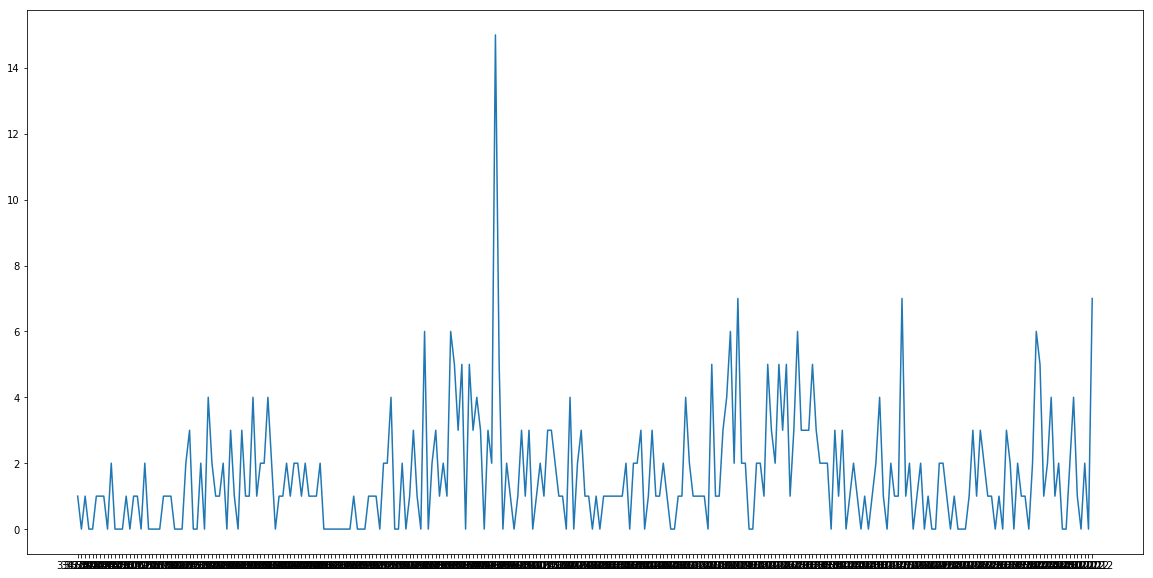

In [70]:
plt.figure(figsize=(20,10))
plt.plot(df_total.groupby('week_number', sort = False)['rape_news'].sum())

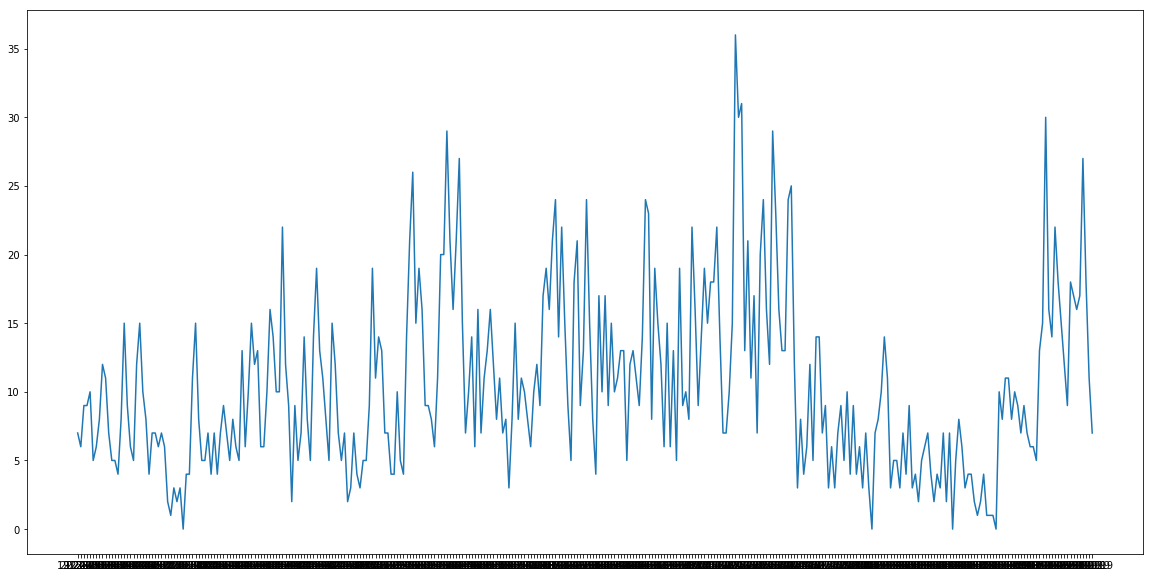

In [71]:
#alo
plt.figure(figsize=(20,10))
plt.plot(df_total_alo.groupby('week_number', sort = False)['rape_news'].sum())

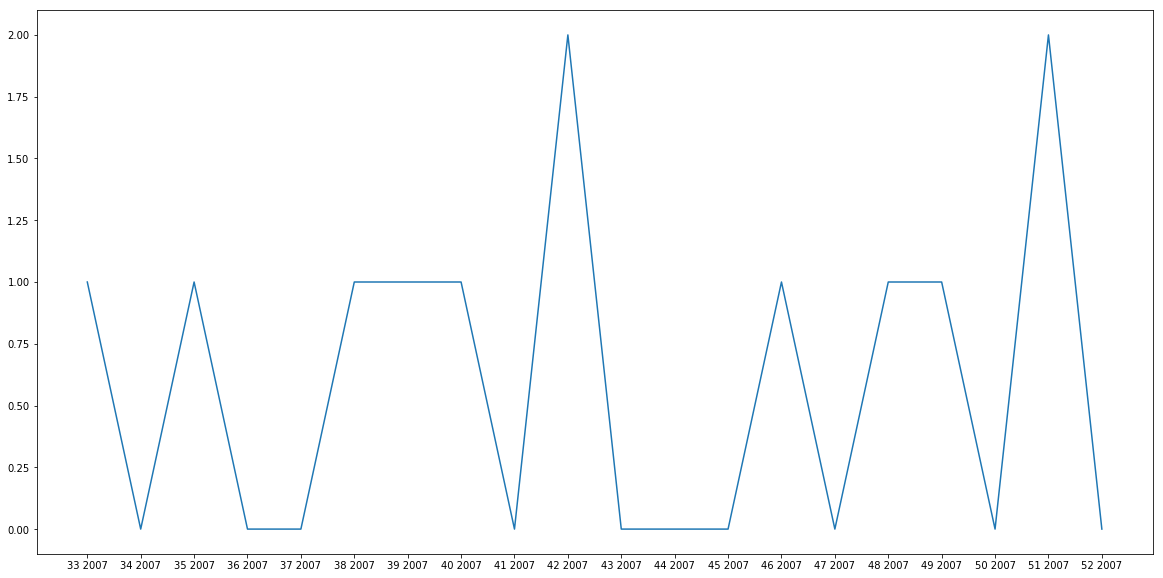

In [72]:
plt.figure(figsize=(20,10))
plt.plot(df_total.groupby('week_number', sort = False)['rape_news'].sum()[:20])

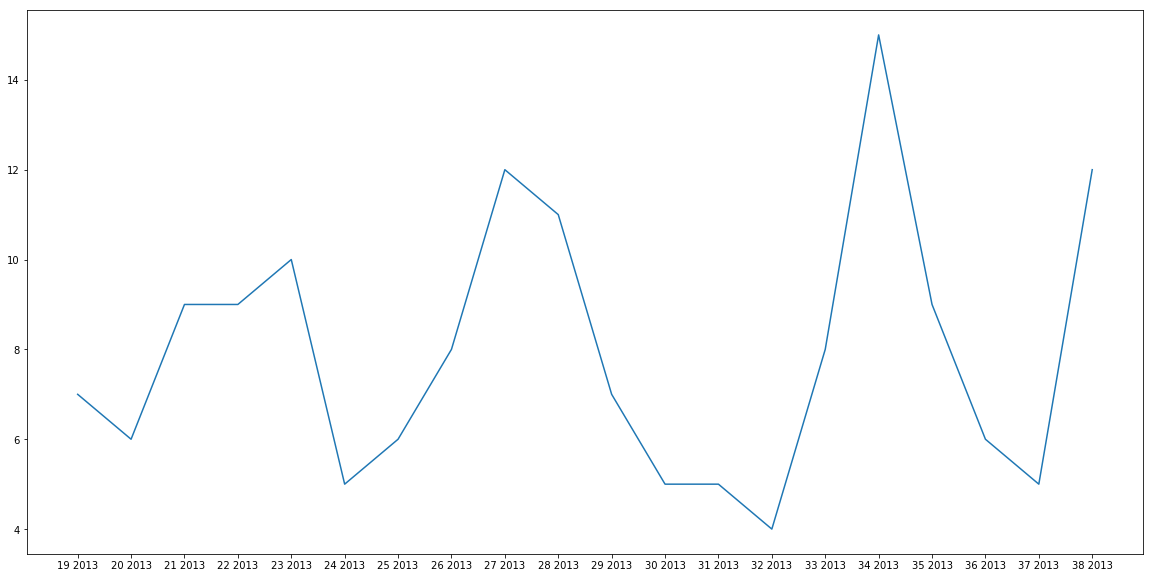

In [73]:
#alo
plt.figure(figsize=(20,10))
plt.plot(df_total_alo.groupby('week_number', sort = False)['rape_news'].sum()[:20])

In [74]:
temp = df_total.groupby('week_number', sort = False)['rape_news'].sum()


In [75]:
temp_alo = df_total_alo.groupby('week_number', sort = False)['rape_news'].sum()

In [76]:
#temp[temp['rape_news'] == temp['rape_news'].max()]


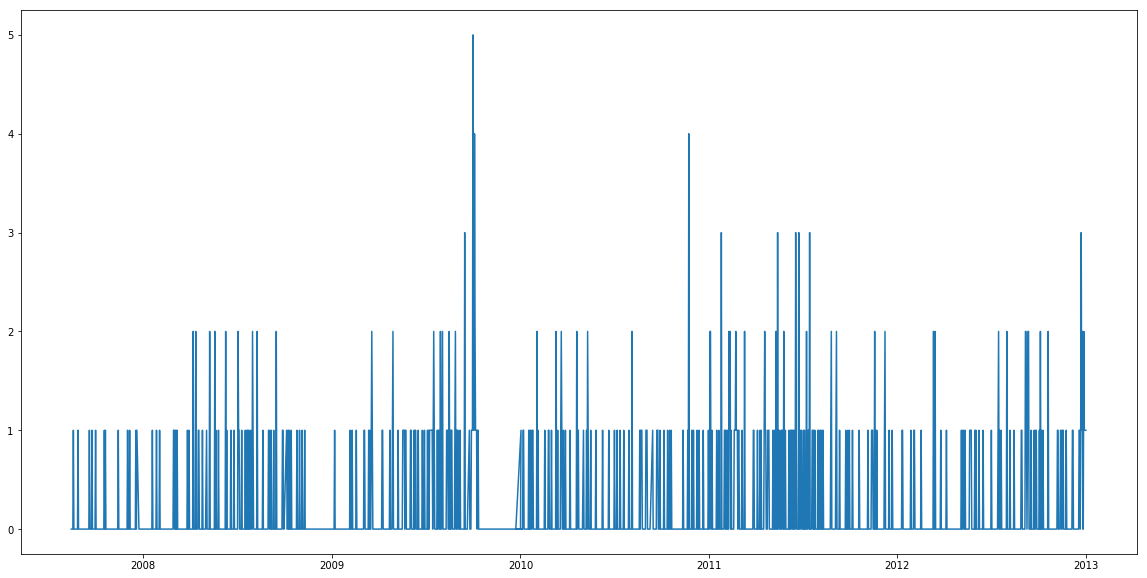

In [77]:
plt.figure(figsize=(20,10))
plt.plot(df_total.groupby('Date', sort = False)['rape_news'].sum())

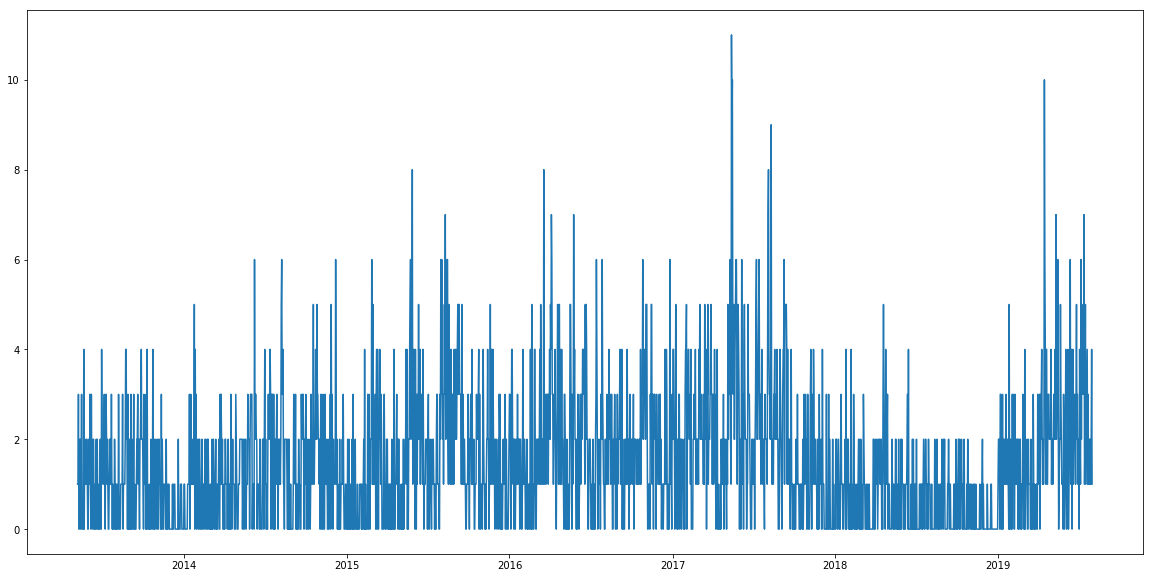

In [78]:
#alo
plt.figure(figsize=(20,10))
plt.plot(df_total_alo.groupby('date', sort = False)['rape_news'].sum())

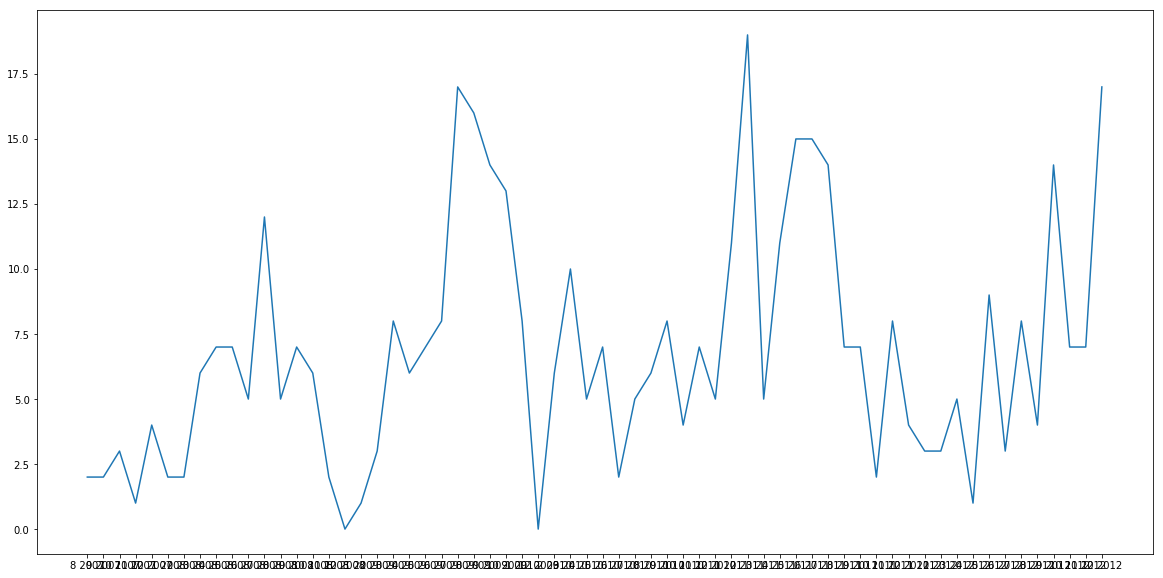

In [79]:
plt.figure(figsize=(20,10))
plt.plot(df_total.groupby('month_number', sort = False)['rape_news'].sum())

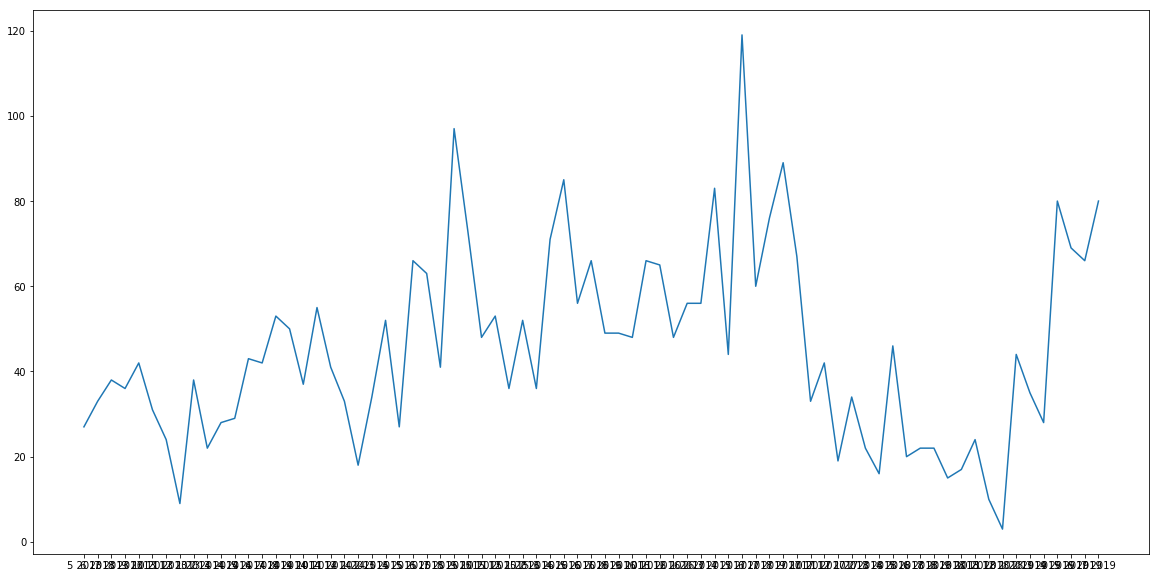

In [80]:
#alo
plt.figure(figsize=(20,10))
plt.plot(df_total_alo.groupby('month_number', sort = False)['rape_news'].sum())

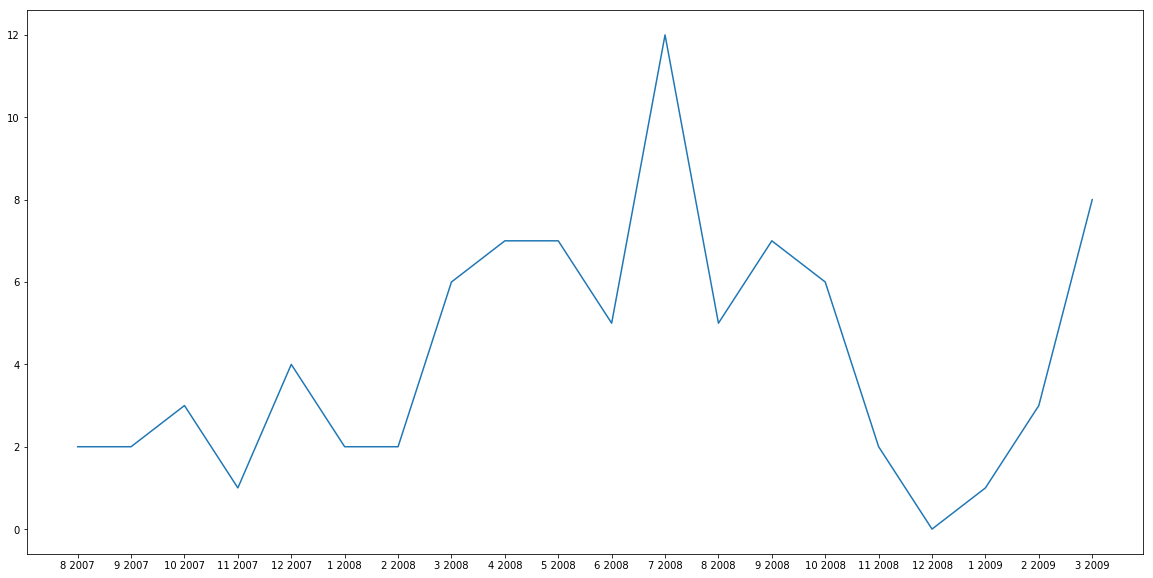

In [81]:
plt.figure(figsize=(20,10))
plt.plot(df_total.groupby('month_number', sort = False)['rape_news'].sum()[:20])

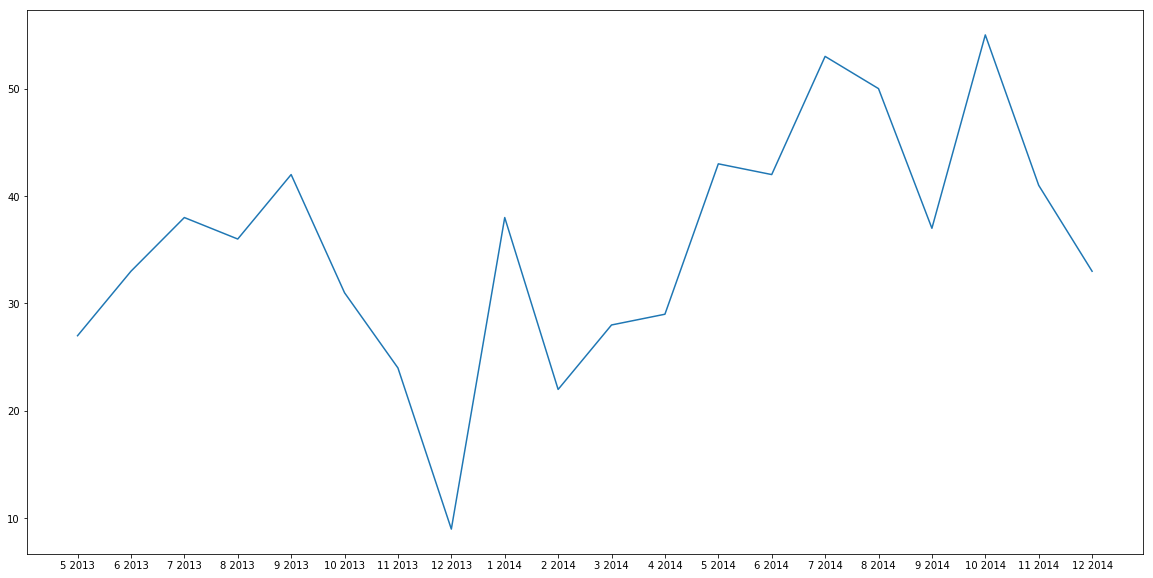

In [82]:
#alo
plt.figure(figsize=(20,10))
plt.plot(df_total_alo.groupby('month_number', sort = False)['rape_news'].sum()[:20])

In [83]:
#df_total.groupby('month_number', sort = False)['rape_news'].sum()

maximum month = 5/2019

In [84]:
#df_total[(df_total['month_number'] == '5 2017') & (df_total['rape_news'] == 1)]

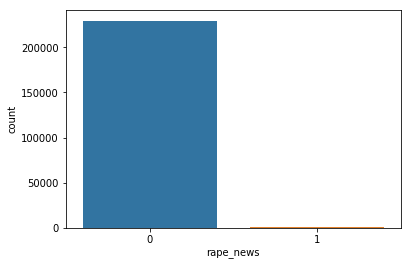

In [85]:
import seaborn as sns
sns.countplot(x = df_total['rape_news'])

In [86]:
grouping = df_total.groupby('month_number', sort = False)[['rape_news']].sum()

In [87]:
grouping_alo = df_total_alo.groupby('month_number', sort = False)[['rape_news']].sum()

In [88]:
grouping.head()

,rape_news
month_number,
8 2007,2
9 2007,2
10 2007,3
11 2007,1
12 2007,4


In [89]:
grouping_alo.head()

,rape_news
month_number,
5 2013,27
6 2013,33
7 2013,38
8 2013,36
9 2013,42


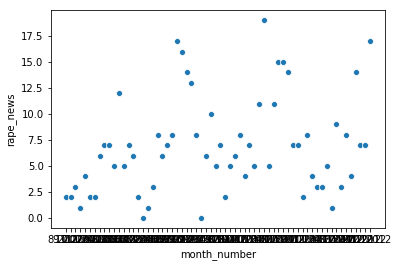

In [90]:
sns.scatterplot(grouping.index,grouping ['rape_news'])

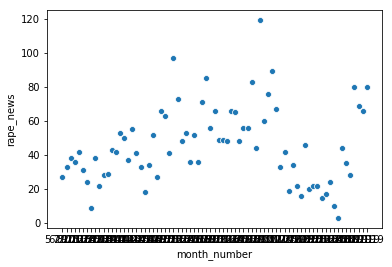

In [91]:
#alo
sns.scatterplot(grouping_alo.index,grouping_alo ['rape_news'])

Interactive Ploting

In [92]:
import plotly.offline as py
import plotly.graph_objs as go

In [93]:
date_group = df_total.groupby('Date', sort = False)[['rape_news']].sum()

In [94]:
date_group_alo = df_total_alo.groupby('date', sort = False)[['rape_news']].sum()

In [95]:
date_group.head()

,rape_news
Date,
2007-08-15,0
2007-08-16,0
2007-08-17,0
2007-08-18,0
2007-08-19,1


In [96]:
trace0 = go.Scatter(x=date_group.index, y=date_group['rape_news'])
data = [trace0]
py.iplot(data)

In [97]:
#alo
trace1 = go.Scatter(x=date_group_alo.index, y=date_group_alo['rape_news'])
data1 = [trace1]
py.iplot(data1)

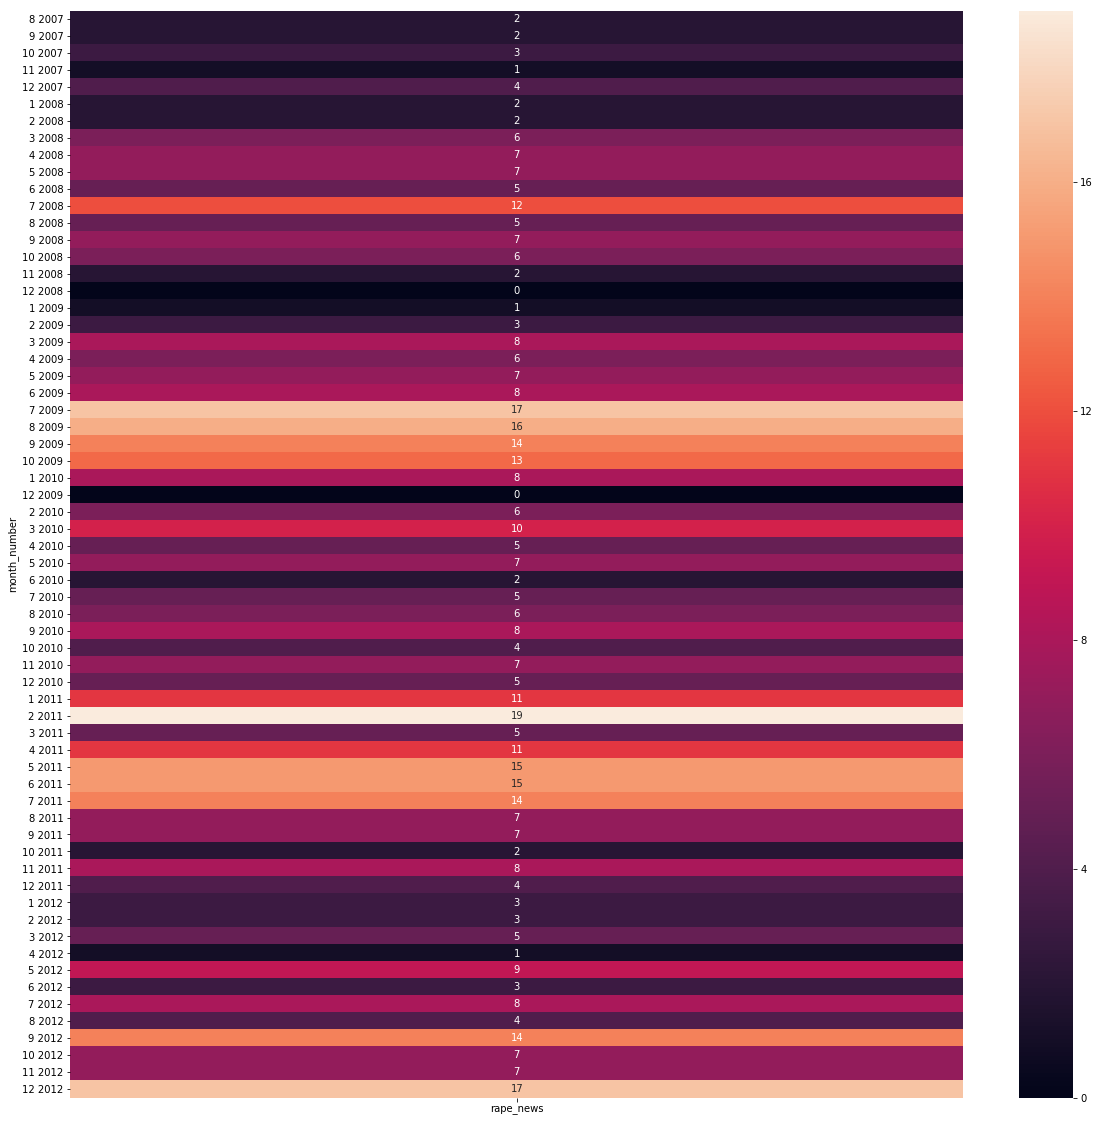

In [98]:
plt.figure(figsize=(20,20))
heat_map = sns.heatmap(grouping, annot=True)

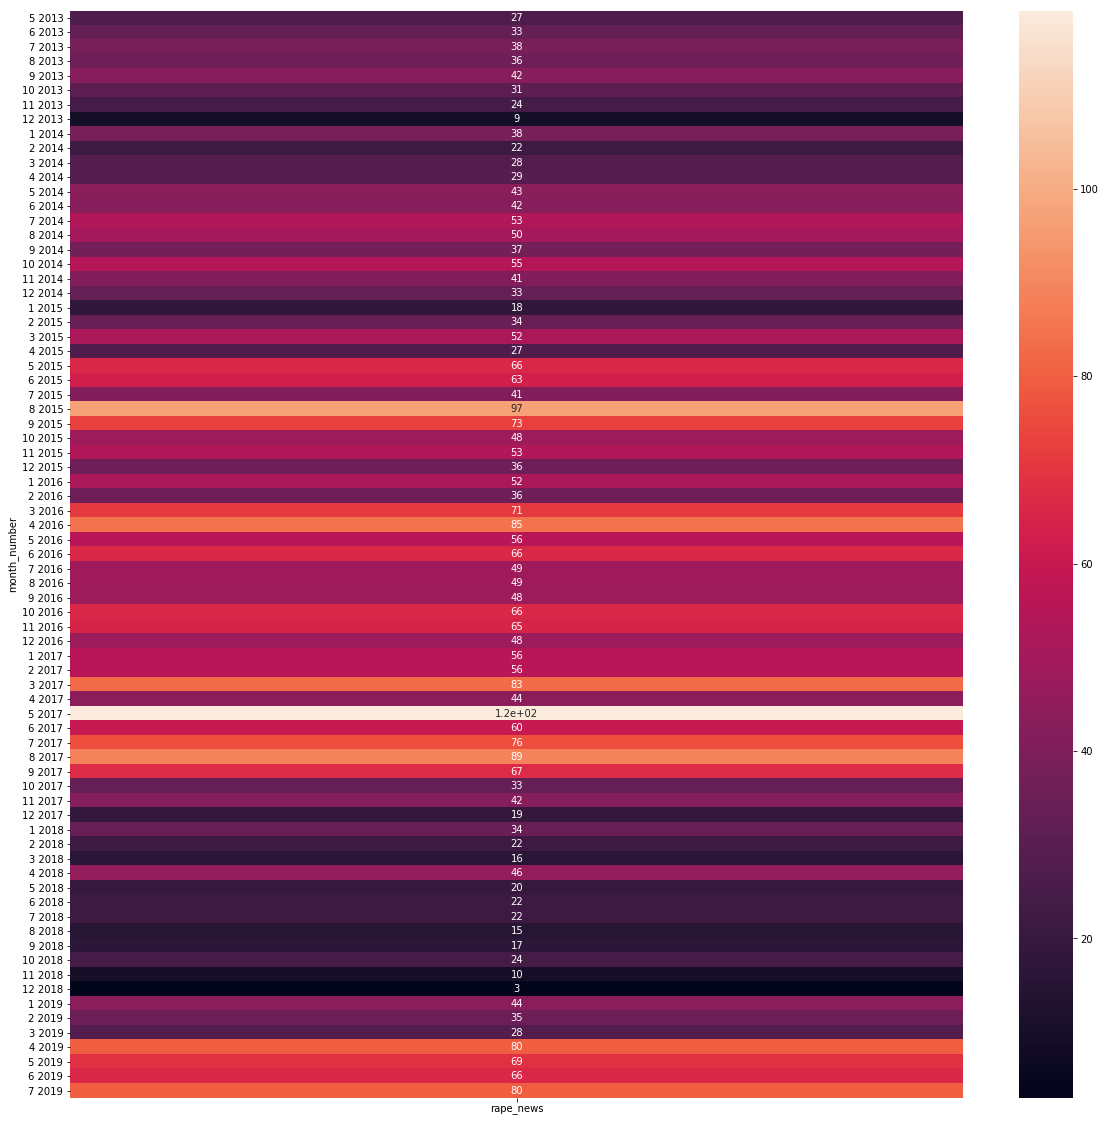

In [99]:
#alo
plt.figure(figsize=(20,20))
heat_map = sns.heatmap(grouping_alo, annot=True)

In [100]:
grouping.head()

,rape_news
month_number,
8 2007,2
9 2007,2
10 2007,3
11 2007,1
12 2007,4


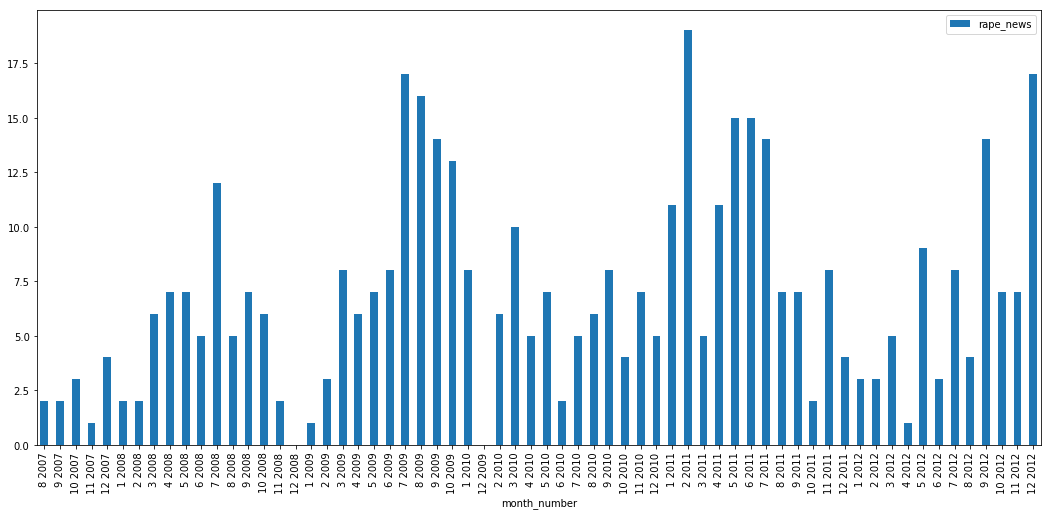

In [101]:
plt.rcParams["figure.figsize"] = [18, 8]
grouping.plot.bar()
#plt.figure(figsize=(20,15))

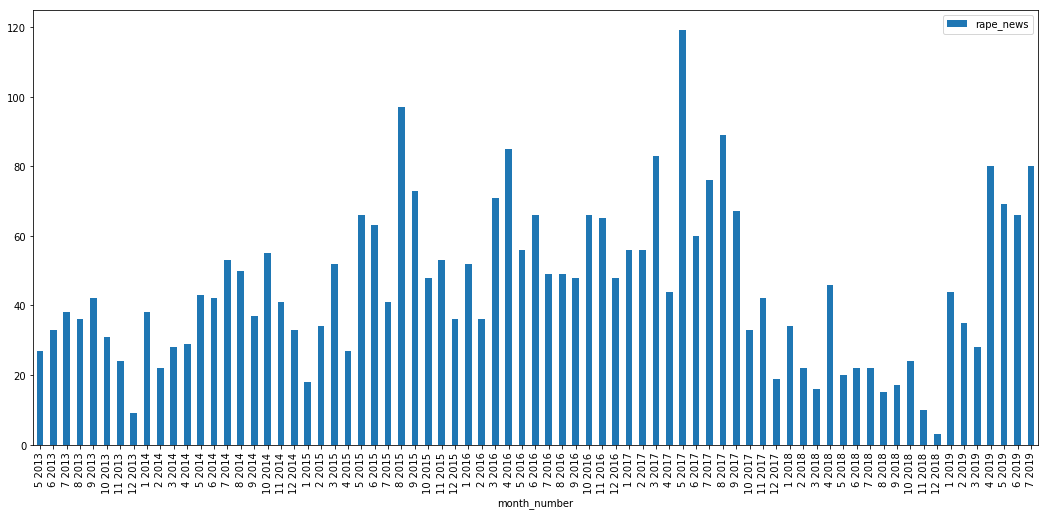

In [102]:
grouping_alo.plot.bar()

In [103]:
grouping_total = pd.concat([grouping, grouping_alo], axis = 0)

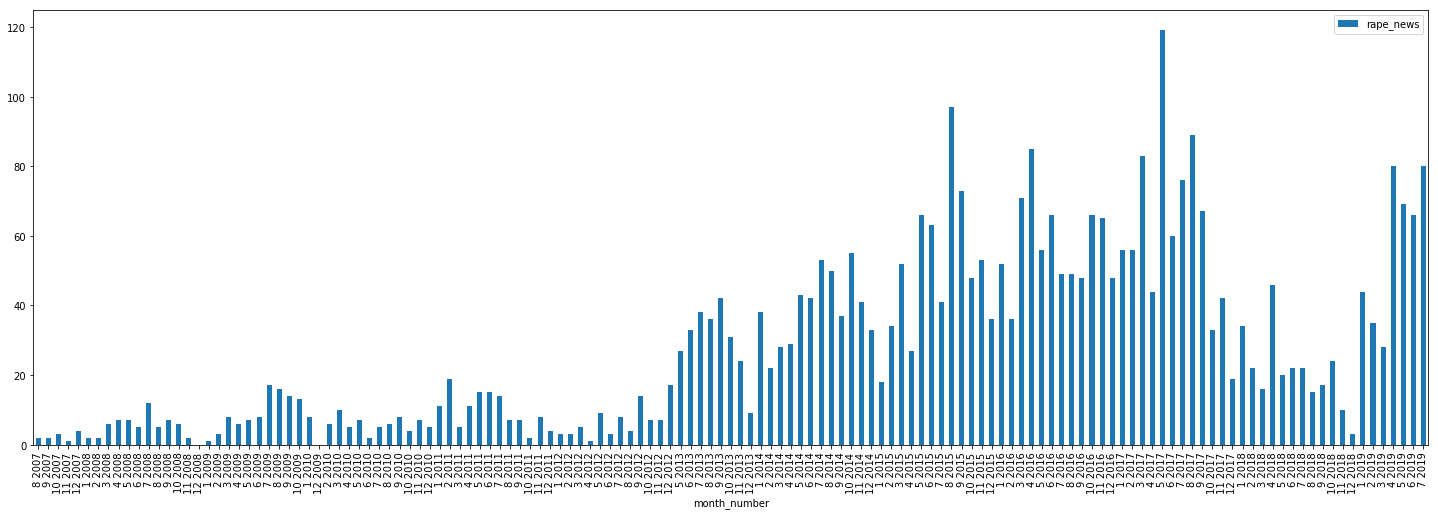

In [104]:
plt.rcParams["figure.figsize"] = [25, 8]
grouping_total.plot.bar()

In [108]:
#sns.countplot(x="month_number",hue = 'rape_news', data=grouping)

In [106]:
df_total['keyword'].value_counts()

Staff Correspondent                                                                                      26480
Sports Reporter                                                                                           9245
Unb, Dhaka                                                                                                6650
Star Business Report                                                                                      5203
Staff Correspondent                                                                                       5157
Afp, London                                                                                               5118
Afp, Washington                                                                                           2403
Bss, Dhaka                                                                                                2341
Metro Desk                                                                                                2212
C

In [107]:
df_total_alo.head()

,date,title,subtitle,author,comment,ref,section,media,page,tags,content,article_id,rape_news,weekday_name,week_number,month_number
0,2013-05-07,ঐক্যের ডাক মালয়েশীয় প্রধানমন্ত্রীরাজাকের,দ্বিতীয়মেয়াদে শপথ গ্রহণ,প্রথম আলো ডেস্ক,NaN,https://www.prothomalo.com/international/artic...,international,print,1,এশিয়া,মালোয়েশিয়ার সাধারণ নির্বাচনে ক্ষমতাসীন জোটের...,188,0,Tue,19 2013,5 2013
1,2013-05-07,ওয়েবসাইটে রবীন্দ্র পাণ্ডুলিপি,NaN,অমর সাহা. কলকাতা,NaN,https://www.prothomalo.com/international/artic...,international,print,1,ভারত,কবিগুরু রবীন্দ্রনাথ ঠাকুরের প্রায় সব পাণ্ডুলি...,187,0,Tue,19 2013,5 2013
2,2013-05-07,বিরোধপূর্ণ সীমান্ত থেকে সেনা প্রত্যাহার শুরু ভ...,NaN,প্রথম আলো ডেস্ক,NaN,https://www.prothomalo.com/international/artic...,international,print,1,ভারত,ভারত ও চীন গতকাল সোমবার হিমালয় এলাকার বিরোধপূ...,186,0,Tue,19 2013,5 2013
3,2013-05-07,যুক্তরাষ্ট্রে‘ঘরোয়া সন্ত্রাস’ আল-কায়েদারনবকৌশল,নিউইয়র্ক টাইমসেরবিশ্লেষণ,প্রথম আলো ডেস্ক,NaN,https://www.prothomalo.com/international/artic...,international,print,1,যুক্তরাষ্ট্র,সন্ত্রাসী হামলা মোকাবিলায় যুক্তরাষ্ট্র তার প্...,185,0,Tue,19 2013,5 2013
4,2013-05-07,সিরিয়ায় বিদ্রোহীরা সারিন গ্যাস ব্যবহার করেছে!,NaN,প্রথম আলো ডেস্ক,NaN,https://www.prothomalo.com/international/artic...,international,print,1,আরব বিশ্ব,সিরিয়ায় জাতিসংঘ তদন্ত দলের প্রধান কার্লা ডেল...,184,0,Tue,19 2013,5 2013
